# EDA

In [1]:
#Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,12

pd.set_option('display.max_columns',None)

In [3]:
#Read dataset

df = pd.read_csv('/content/drive/MyDrive/flight_train.csv')
df.columns = map(str.lower, df.columns)
df.head()

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


## Data Understanding

In [4]:
#Brief information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          55000 non-null  int64  
 1   ffp_date           55000 non-null  object 
 2   first_flight_date  55000 non-null  object 
 3   gender             54997 non-null  object 
 4   ffp_tier           55000 non-null  int64  
 5   work_city          53034 non-null  object 
 6   work_province      52216 non-null  object 
 7   work_country       54980 non-null  object 
 8   age                54658 non-null  float64
 9   load_time          55000 non-null  object 
 10  flight_count       55000 non-null  int64  
 11  bp_sum             55000 non-null  int64  
 12  sum_yr_1           54738 non-null  float64
 13  sum_yr_2           54937 non-null  float64
 14  seg_km_sum         55000 non-null  int64  
 15  last_flight_date   55000 non-null  object 
 16  last_to_end        550

In [5]:
df.duplicated().sum()

0

Findings:
* **`ffp_date, first_flight_date, load_time, and last_flight_date `** features should be datetime data types because all four features contain date.
* Feature **`age`** should be in integer type
* **`gender, work_city, work_province, work_country, age, sum_yr_1, sum_yr_2`** feature has missing data
* No duplicated data.

In [6]:
#Amount of missing data
df_clean = df.copy()

data_missing_value = df_clean.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df_clean))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,work_province,2784,5.062
1,work_city,1966,3.575
2,age,342,0.622
3,sum_yr_1,262,0.476
4,sum_yr_2,63,0.115
5,work_country,20,0.036
6,gender,3,0.005


In [7]:
col_missing_value = data_missing_value['feature'].tolist() 
df_clean[col_missing_value].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   work_province  52216 non-null  object 
 1   work_city      53034 non-null  object 
 2   age            54658 non-null  float64
 3   sum_yr_1       54738 non-null  float64
 4   sum_yr_2       54937 non-null  float64
 5   work_country   54980 non-null  object 
 6   gender         54997 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.9+ MB


## Handling Missing Value

In [8]:
#Handle Missing Value

df_clean['work_city'].fillna(df_clean['work_city'].mode()[0], inplace=True)
df_clean['work_province'].fillna(df_clean['work_province'].mode()[0], inplace=True)
df_clean['work_country'].fillna(df_clean['work_country'].mode()[0], inplace=True)
df_clean['gender'] = df_clean['gender'].fillna('Male')

#Handle Missing Value 2
miss = ['age', 'sum_yr_1','last_to_end', 'avg_interval', 'max_interval',
        'exchange_count', 'avg_discount', 'points_sum', 'point_notflight', 'sum_yr_2']
for i in miss:
  df_clean[miss] = df_clean[miss].fillna(df_clean[miss].mean())


In [9]:
data_missing_value = df_clean.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value

,feature,missing_value
0,member_no,0
1,ffp_date,0
2,first_flight_date,0
3,gender,0
4,ffp_tier,0
5,work_city,0
6,work_province,0
7,work_country,0
8,age,0
9,load_time,0


Findings:

* In **`work_city, work_province, work_country`** features use the mode value for each missing row, because there are quite a lot of missing data.

* The **`gender`** feature also uses the mode value.

* In other features, the empty data is filled with the mean value.

## Fix Datatype

In [10]:
#Fix age datatype
df_clean['age'] = df_clean['age'].astype(int)

In [11]:
#Fix datetime datatype

date_col = ['ffp_date', 'first_flight_date', 'load_time','last_flight_date']
for col in date_col:
  df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')

df_clean['last_flight_date'] = df_clean['last_flight_date'].fillna(df_clean['last_flight_date'].mean())

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   member_no          55000 non-null  int64         
 1   ffp_date           55000 non-null  datetime64[ns]
 2   first_flight_date  55000 non-null  datetime64[ns]
 3   gender             55000 non-null  object        
 4   ffp_tier           55000 non-null  int64         
 5   work_city          55000 non-null  object        
 6   work_province      55000 non-null  object        
 7   work_country       55000 non-null  object        
 8   age                55000 non-null  int64         
 9   load_time          55000 non-null  datetime64[ns]
 10  flight_count       55000 non-null  int64         
 11  bp_sum             55000 non-null  int64         
 12  sum_yr_1           55000 non-null  float64       
 13  sum_yr_2           55000 non-null  float64       
 14  seg_km

# Feature Engineering

We will use RFM Analysis.

## Selecting Columns

In [13]:
df_clean.head(5)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31,2014-03-31,210,505308,239560.0,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,28065,2007-02-19,2007-08-03,Male,6,guangzhou,beijing,CN,42,2014-03-31,140,362480,171483.0,167434.0,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40,2014-03-31,135,351159,163618.0,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64,2014-03-31,23,337314,116350.0,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48,2014-03-31,152,273844,124560.0,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39


In [14]:
# member_time = the day the data was taken - the first day to become a member
df_clean['member_time'] = (df_clean['load_time'] - df_clean['ffp_date']).dt.days
df_clean.sample(5)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,member_time
17869,59866,2011-12-26,2012-01-12,Female,4,zhengzhoushi,henansheng,CN,55,2014-03-31,19,14137,8379.0,4884.0,15984,2013-12-10,113,31.944444,236,0,0.856576,14137,0,826
1500,45867,2006-09-09,2006-09-19,Male,4,guangzhou,guangdong,CN,32,2014-03-31,43,47352,32999.0,14842.0,79095,2014-02-03,58,15.952381,78,3,0.753221,47752,5,2760
30296,41546,2011-07-02,2011-07-13,Male,4,xinmi,henan,CN,32,2014-03-31,8,6529,2303.0,4492.0,11088,2014-02-17,44,66.714286,168,0,0.665420,6529,0,1003
25719,13183,2009-10-31,2009-11-04,Male,4,laiyang,shandong,CN,61,2014-03-31,6,9365,7849.0,1371.0,12567,2013-07-21,255,76.000000,210,0,0.732310,9365,0,1612
36906,5077,2011-02-02,2011-02-02,Male,4,haerbin,heilongjiang,CN,40,2014-03-31,6,5583,3504.0,1622.0,6060,2013-06-25,281,82.600000,303,0,0.890000,5583,0,1153


In [15]:
#Select columns for RFM Analysis
df_new = df_clean[['member_no', 'member_time', 'last_to_end', 'flight_count', 'seg_km_sum', 'avg_discount', 'ffp_tier', 'avg_interval', 'max_interval']].copy()
df_new

,member_no,member_time,last_to_end,flight_count,seg_km_sum,avg_discount,ffp_tier,avg_interval,max_interval
0,54993,2706,1,210,580717,0.961639,6,3.483254,18
1,28065,2597,7,140,293678,1.252314,6,5.194245,17
2,55106,2615,11,135,283712,1.254676,6,5.298507,18
3,21189,2047,97,23,281336,1.090870,5,27.863636,73
4,39546,1816,5,152,309928,0.970658,6,4.788079,47
...,...,...,...,...,...,...,...,...,...
54995,33264,426,368,2,3453,0.580828,4,60.000000,60
54996,3826,1963,387,2,3820,0.525000,4,173.000000,173
54997,10522,1067,570,2,4222,0.475000,4,94.000000,94
54998,16872,1382,22,4,2596,0.772500,4,33.000000,82


In [16]:
df_new.describe()

,member_no,member_time,last_to_end,flight_count,seg_km_sum,avg_discount,ffp_tier,avg_interval,max_interval
count,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000
mean,31549.707145,1510.307255,155.593436,13.213527,19256.688255,0.736753,4.115727,62.979631,172.201745
std,18177.005101,850.443490,169.987954,14.528764,21613.796416,0.177283,0.395579,64.506386,117.382011
min,1.000000,365.000000,1.000000,2.000000,1380.000000,0.136017,4.000000,0.000000,0.000000
25%,15798.750000,751.000000,25.000000,4.000000,6332.000000,0.629210,4.000000,25.166667,90.000000
50%,31559.500000,1308.000000,91.000000,8.000000,11983.000000,0.720056,4.000000,44.600000,149.000000
75%,47322.250000,2207.000000,226.000000,16.000000,23761.500000,0.813888,4.000000,77.500000,230.000000
max,62988.000000,3437.000000,730.000000,213.000000,580717.000000,1.500000,6.000000,714.000000,719.000000


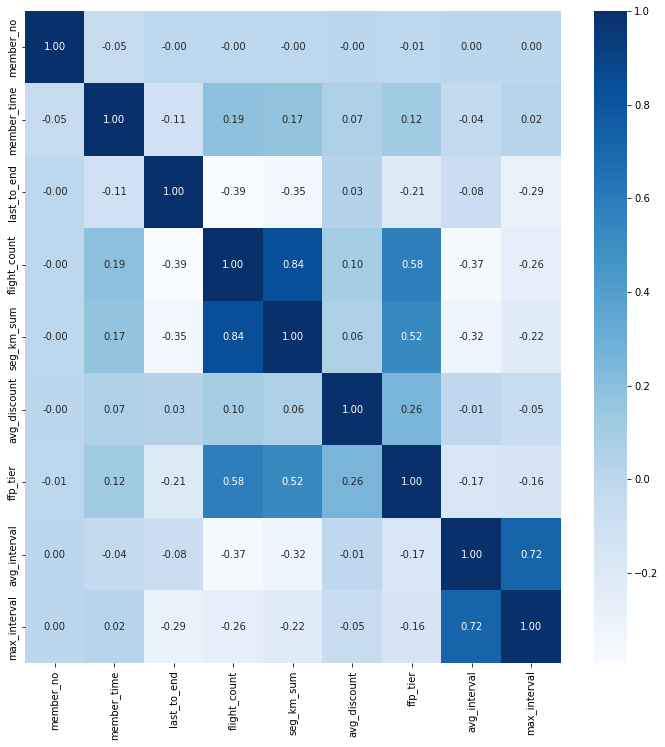

In [17]:
sns.heatmap(df_new.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.show()

## Delete Outliers

In [18]:
df_no_outliers = df_new.copy()
df_no_outliers

,member_no,member_time,last_to_end,flight_count,seg_km_sum,avg_discount,ffp_tier,avg_interval,max_interval
0,54993,2706,1,210,580717,0.961639,6,3.483254,18
1,28065,2597,7,140,293678,1.252314,6,5.194245,17
2,55106,2615,11,135,283712,1.254676,6,5.298507,18
3,21189,2047,97,23,281336,1.090870,5,27.863636,73
4,39546,1816,5,152,309928,0.970658,6,4.788079,47
...,...,...,...,...,...,...,...,...,...
54995,33264,426,368,2,3453,0.580828,4,60.000000,60
54996,3826,1963,387,2,3820,0.525000,4,173.000000,173
54997,10522,1067,570,2,4222,0.475000,4,94.000000,94
54998,16872,1382,22,4,2596,0.772500,4,33.000000,82


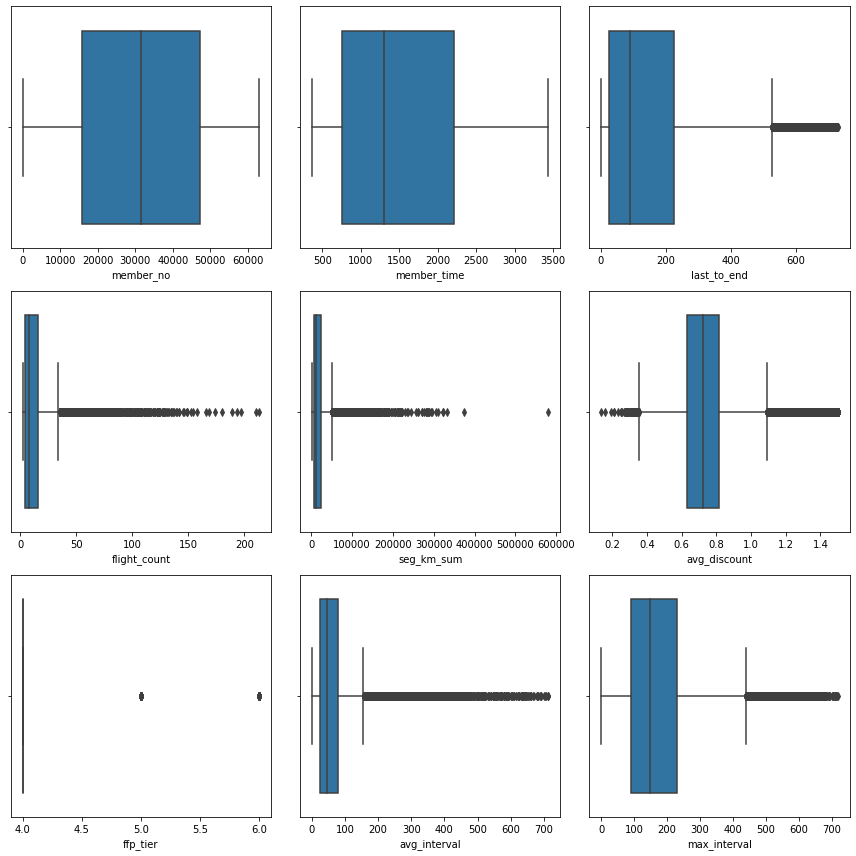

In [19]:
#Before deleting outliers
for i in range(0, len(df_no_outliers.columns)):
  plt.subplot(3,3, i+1)
  sns.boxplot(x=df_no_outliers[df_no_outliers.columns[i]])
  plt.tight_layout()

In [20]:
import scipy.stats as st
outliers = ['last_to_end', 'flight_count','seg_km_sum','avg_discount', 'ffp_tier','avg_interval', 'max_interval']

for i in outliers:
  z_scores = np.abs(st.zscore(df_no_outliers[i]))
  filtered_entries = (z_scores < 3)
  df_no_outliers = df_no_outliers[filtered_entries]
df_no_outliers.shape

(46808, 9)

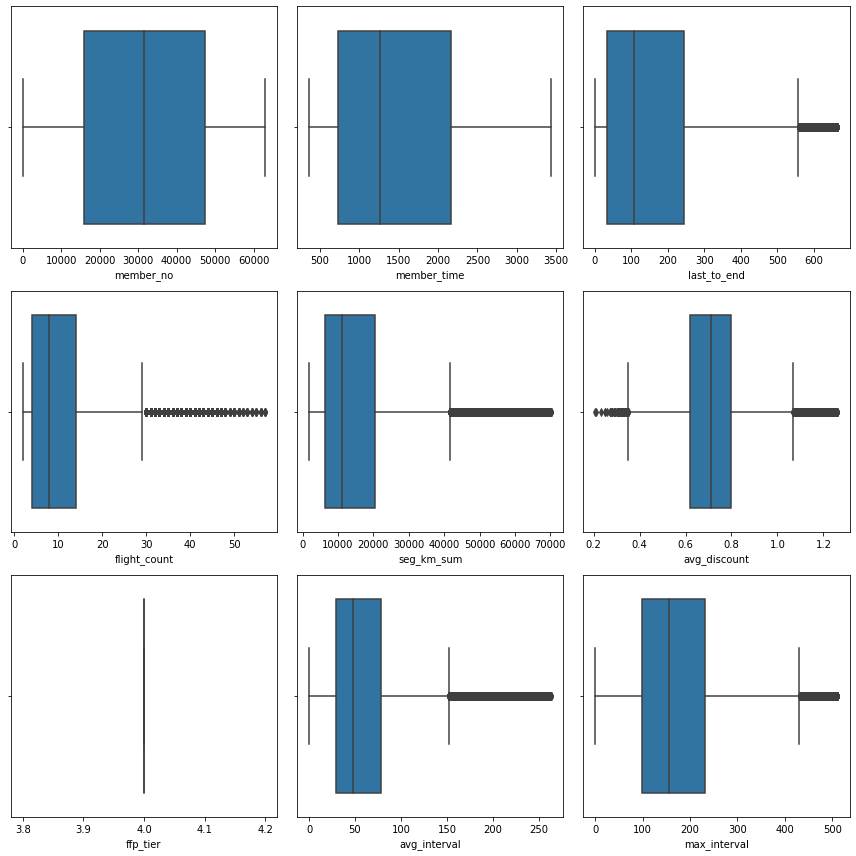

In [21]:
#After deleting outliers
for i in range(0, len(df_no_outliers.columns)):
  plt.subplot(3,3, i+1)
  sns.boxplot(x=df_no_outliers[df_no_outliers.columns[i]])
  plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


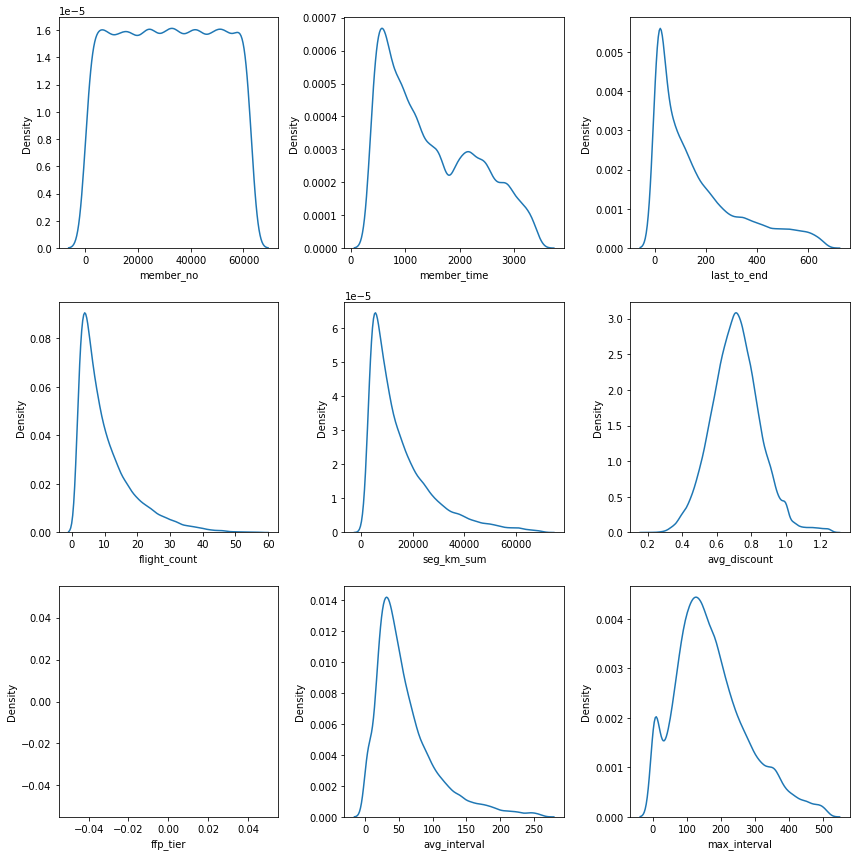

In [22]:
for i in range(0, len(df_no_outliers.columns)):
  plt.subplot(3,3, i+1)
  sns.kdeplot(x=df_no_outliers[df_no_outliers.columns[i]])
  plt.tight_layout()

## Dimensional Reduction

In [23]:
df_reduction = df_no_outliers.reset_index(drop=True).copy()

In [24]:
df_reduction

,member_no,member_time,last_to_end,flight_count,seg_km_sum,avg_discount,ffp_tier,avg_interval,max_interval
0,50754,972,20,56,65103,1.167142,4,12.690909,66
1,11051,3338,39,50,66551,1.070130,4,13.979592,133
2,29499,2392,38,19,67361,1.029754,4,38.444444,133
3,62918,2594,28,24,58285,1.166276,4,29.434783,101
4,58031,499,224,7,62686,1.026835,4,46.166667,172
...,...,...,...,...,...,...,...,...,...
46803,33264,426,368,2,3453,0.580828,4,60.000000,60
46804,3826,1963,387,2,3820,0.525000,4,173.000000,173
46805,10522,1067,570,2,4222,0.475000,4,94.000000,94
46806,16872,1382,22,4,2596,0.772500,4,33.000000,82


In [25]:
#Dimension reduction 1
# Transform 'member_time', 'last_to_end','avg_interval', 'max_interval' to 'recency'

from sklearn.decomposition import PCA
reduc1 = df_reduction[['member_time', 'last_to_end','avg_interval', 'max_interval']]
pca = PCA(n_components=1)

pca.fit(reduc1)
pcs1 = pca.transform(reduc1)

data_pca1 = pd.DataFrame(data = pcs1, columns = ['recency'])
df_pca1 = df_reduction.join(data_pca1)

In [26]:
pca.explained_variance_ratio_

array([0.94600824])

**94% of information is still saved.**

In [27]:
#Dimension reduction 2
# Transform 'seg_km_sum', 'avg_discount', 'ffp_tier' to 'monetary'.

reduc2 = df_reduction[['seg_km_sum', 'avg_discount', 'ffp_tier']]
pca = PCA(n_components=1)

pca.fit(reduc2)
pcs2 = pca.transform(reduc2)

data_pca2 = pd.DataFrame(data = pcs2, columns = ['monetary'])
df_pca2 = df_pca1.join(data_pca2)

In [28]:
pca.explained_variance_ratio_

array([1.])

**100% of information is still saved.**

In [29]:
#Drop reduced column
df_pca = df_pca2.drop(columns=['member_time', 'last_to_end'])

#Change column 'flight count' to 'frequency'
df_pca.rename(columns={'flight_count':'frequency'}, inplace=True)

#Cleaning up RFM dataframes
df_pca = df_pca[['member_no', 'recency', 'frequency', 'monetary']]
df_pca

,member_no,recency,frequency,monetary
0,50754,-501.524252,56,49703.898051
1,11051,1864.161577,50,51151.898051
2,29499,918.347930,19,51961.898051
3,62918,1120.269341,24,42885.898051
4,58031,-977.373873,7,47286.898051
...,...,...,...,...
46803,33264,-1053.736420,2,-11946.101948
46804,3826,483.390014,2,-11579.101948
46805,10522,-416.260742,2,-11177.101948
46806,16872,-91.531100,4,-12803.101948


In [30]:
df_pca.describe()

,member_no,recency,frequency,monetary
count,46808.000000,4.680800e+04,46808.000000,4.680800e+04
mean,31574.400957,2.321098e-13,10.556358,3.388163e-11
std,18183.096575,8.396662e+02,8.509553,1.245514e+04
min,1.000000,-1.115058e+03,2.000000,-1.357110e+04
25%,15843.500000,-7.405549e+02,4.000000,-9.101102e+03
50%,31621.500000,-2.126685e+02,8.000000,-4.171102e+03
75%,47371.250000,6.868424e+02,14.000000,5.041398e+03
max,62988.000000,1.963692e+03,57.000000,5.486990e+04


## Normalize Data

In [31]:
df_norm = df_pca.copy()
df_norm

,member_no,recency,frequency,monetary
0,50754,-501.524252,56,49703.898051
1,11051,1864.161577,50,51151.898051
2,29499,918.347930,19,51961.898051
3,62918,1120.269341,24,42885.898051
4,58031,-977.373873,7,47286.898051
...,...,...,...,...
46803,33264,-1053.736420,2,-11946.101948
46804,3826,483.390014,2,-11579.101948
46805,10522,-416.260742,2,-11177.101948
46806,16872,-91.531100,4,-12803.101948


In [32]:
normalize = ['recency', 'frequency', 'monetary']
from sklearn.preprocessing import StandardScaler
df_norm[normalize] = StandardScaler().fit_transform(df_norm[normalize])

df_norm

,member_no,recency,frequency,monetary
0,50754,-0.597296,5.340366,3.990677
1,11051,2.220146,4.635269,4.106936
2,29499,1.093718,0.992265,4.171970
3,62918,1.334198,1.579846,3.443267
4,58031,-1.164015,-0.417930,3.796619
...,...,...,...,...
46803,33264,-1.254960,-1.005511,-0.959141
46804,3826,0.575699,-1.005511,-0.929675
46805,10522,-0.495751,-1.005511,-0.897399
46806,16872,-0.109010,-0.770479,-1.027949


# Clustering

## n cluster

In [33]:
rfm = df_norm.drop(columns=('member_no'))
rfm.sample()

,recency,frequency,monetary
22012,1.511602,-0.41793,-0.248744


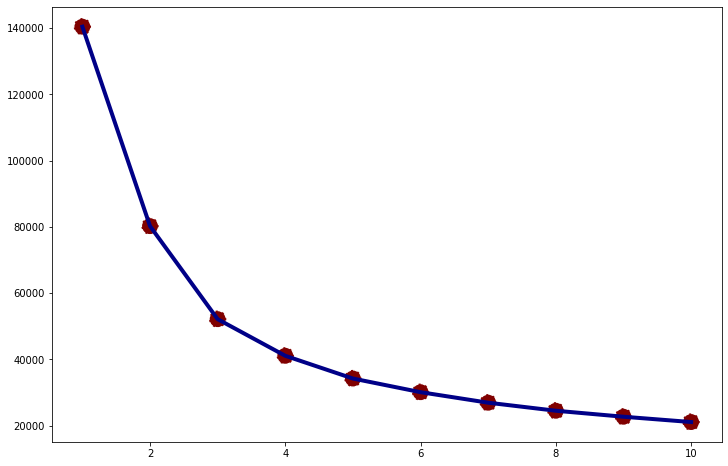

In [34]:
# Finding the best number of n clusters using the elbow method

from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(rfm)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')


**Optimum cluster with elbow method is 4.**

## Modeling

In [35]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(rfm)

In [36]:
segment = rfm.copy()
segment['cluster'] = kmeans.labels_
segment

,recency,frequency,monetary,cluster
0,-0.597296,5.340366,3.990677,3
1,2.220146,4.635269,4.106936,3
2,1.093718,0.992265,4.171970,3
3,1.334198,1.579846,3.443267,3
4,-1.164015,-0.417930,3.796619,1
...,...,...,...,...
46803,-1.254960,-1.005511,-0.959141,2
46804,0.575699,-1.005511,-0.929675,0
46805,-0.495751,-1.005511,-0.897399,2
46806,-0.109010,-0.770479,-1.027949,2


## Visualize Model

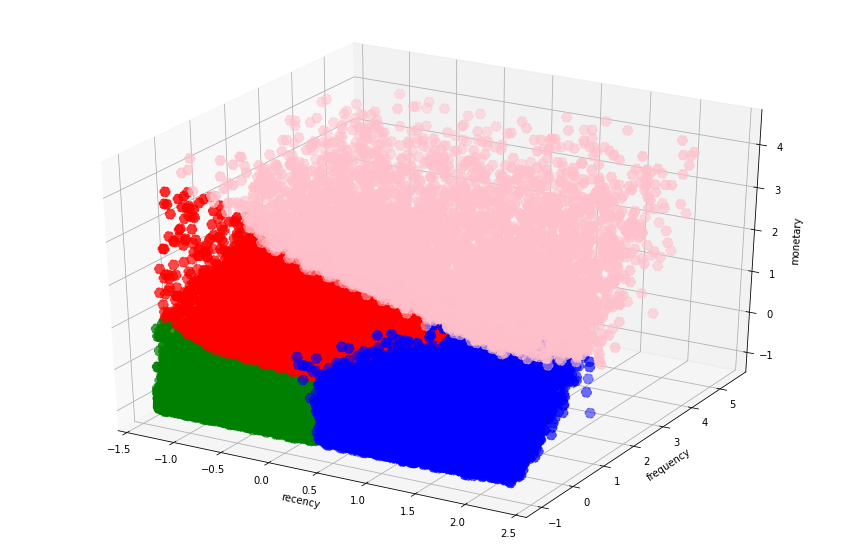

In [37]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(segment['recency'][segment.cluster == 0], segment["frequency"][segment.cluster == 0], segment["monetary"][segment.cluster == 0], c='blue', s=100, edgecolor='blue',linestyle='--')
ax.scatter(segment['recency'][segment.cluster == 1], segment["frequency"][segment.cluster == 1], segment["monetary"][segment.cluster == 1], c='red', s=100, edgecolor='red',linestyle='--')
ax.scatter(segment['recency'][segment.cluster == 2], segment["frequency"][segment.cluster == 2], segment["monetary"][segment.cluster == 2], c='green', s=100, edgecolor='green',linestyle='--')
ax.scatter(segment['recency'][segment.cluster == 3], segment["frequency"][segment.cluster == 3], segment["monetary"][segment.cluster == 3], c='pink', s=100, edgecolor='pink',linestyle='--')


plt.xlabel('recency')
plt.ylabel("frequency")
ax.set_zlabel('monetary')
plt.show()

# Insight

## New Dataset

In [38]:
segment_member = df_norm.merge(segment,
                               on = ['recency', 'frequency', 'monetary'],
                               how ='outer')
segment_member.drop(columns=(['recency', 'frequency', 'monetary']), inplace=True)
segment_member.drop_duplicates(inplace=True)
segment_member

,member_no,cluster
0,50754,3
1,11051,3
2,29499,3
3,62918,3
4,58031,1
...,...,...
46931,33264,2
46932,3826,0
46933,10522,2
46934,16872,2


In [39]:
#Merge datasets
df_customer_segment = df_clean.merge(segment_member,
                               on ='member_no',
                               how ='outer')
df_customer_segment['cluster'] = df_customer_segment['cluster'].fillna(4)
df_customer_segment

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,member_time,cluster
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31,2014-03-31,210,505308,239560.000000,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50,2706,4.0
1,28065,2007-02-19,2007-08-03,Male,6,guangzhou,beijing,CN,42,2014-03-31,140,362480,171483.000000,167434.0,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33,2597,4.0
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40,2014-03-31,135,351159,163618.000000,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26,2615,4.0
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64,2014-03-31,23,337314,116350.000000,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12,2047,4.0
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48,2014-03-31,152,273844,124560.000000,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39,1816,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,33264,2013-01-29,2013-01-29,Male,4,shenzhen,guangdong,CN,32,2014-03-31,2,1967,1750.000000,0.0,3453,2013-03-30,368,60.000000,60,0,0.580828,1967,0,426,2.0
54996,3826,2008-11-14,2008-12-12,Male,4,guangzhou,guangdong,CN,56,2014-03-31,2,1452,1785.000000,0.0,3820,2013-03-11,387,173.000000,173,0,0.525000,1452,0,1963,0.0
54997,10522,2011-04-29,2011-04-29,Male,4,shanghai,shanghai,CN,42,2014-03-31,2,759,6002.575145,0.0,4222,2012-09-09,570,94.000000,94,0,0.475000,2259,1,1067,2.0
54998,16872,2010-06-18,2010-06-18,Female,4,benxishi,liaoningsheng,CN,36,2014-03-31,4,2074,0.000000,2163.0,2596,2014-03-10,22,33.000000,82,0,0.772500,2074,0,1382,2.0


In [40]:
#Number of consumers per segment
member_segmentation = df_customer_segment.groupby('cluster').agg({'member_no':'count'}).reset_index()
member_segmentation

,cluster,member_no
0,0.0,12935
1,1.0,9064
2,2.0,20056
3,3.0,4753
4,4.0,8192


## Interpretation

In [41]:
#Find the average RFM of each segment

result = segment.groupby('cluster').agg({'recency':'mean',
                                'frequency': 'mean',
                                'monetary':'mean'}).reset_index(drop=True)
result['no_cluster'] = [0,1,2,3]
result.rename(columns={'cluster':'total'}, inplace=True)
result

,recency,frequency,monetary,no_cluster
0,1.174397,-0.337326,-0.349991,0
1,-0.414228,0.634284,0.659395,1
2,-0.712450,-0.579960,-0.580034,2
3,0.600174,2.155659,2.142548,3


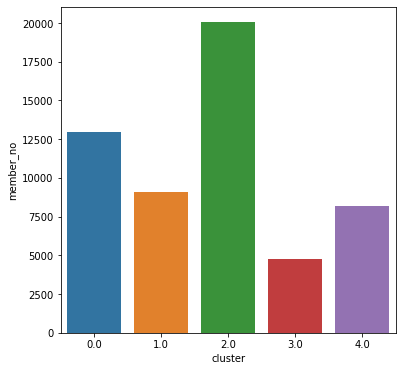

In [45]:
# Total Customer by Segment
plt.figure(figsize=(6,6))
sns.barplot(data=member_segmentation, x='cluster', y='member_no')
plt.show()

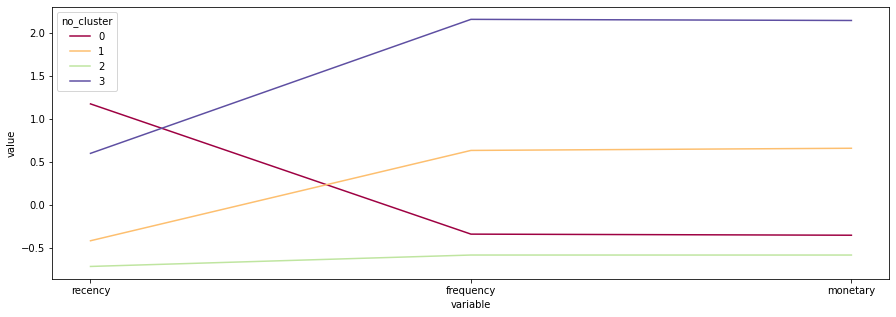

In [42]:
# Snake plot
result_melt = pd.melt(result, id_vars='no_cluster', value_vars=['recency', 'frequency', 'monetary'])

plt.figure(figsize=(15,5))
sns.lineplot(data=result_melt, x='variable', y='value', hue='no_cluster', markers=True, palette='Spectral')
plt.show()

- **Segment 0 (Potential Churn/Low Value Customer)**: Consumers have made their last purchase for a long time with low purchase frequency and minimal total value.

- **Segment 1 (General Customer)**: Consumers have made their last purchase for a long time with moderate purchase frequency and total value.

- **Segment 2 (New Customer)**: The customer has just made a transaction with a small frequency and total value.

- **Segment 3 (High Value Customer)**: Consumers made the last purchase not too long ago with high frequency and high total value as well.

- **Segment 4 (Outlier)**: Further analysis is needed for consumers with this segment.

## Recommendation

**Segment 0: Potential Churn/Low Value Customer** 

Provide a personalized marketing campaign related to the same product/flight ticket when the customer last transacted.

**Segment 1: General Customers**

Focus on convincing consumers to buy the product again. With a long last purchase time, marketing campaigns in the form of follow-up emails, new offers, and various discounts are steps that can be taken to target these consumers.

**Segment 2: New Customers**

First impressions are important for new consumers. Providing an email welcome offer, tips on using flight products and helpful information for new customers are some of the steps that can be taken.

**Segment 3: High-Value Customers**

Focus on providing information on new products and loyalty programs on a regular basis. Because these consumers have the habit of buying with high frequency and value, they do not need to be given a high discount. But it focuses more on providing information regarding premium products and new products from the company.